___
**Identificação**: Diego Calbo Rech (2755224), Thomas Dahlin Dias Schuster (2444488)
___


# Ánalise de Sentimentos nas Críticas de Filmes


## **Objetivo**

Será realizada uma análise em diversas críticas de filmes, onde o algoritmo irá classificar se a crítica é positiva ou negativa.


## **Especificação Técnica**

Dataset: Para desenvolvimento desse projeto, será utilizado o dataset de críticas do IMDB traduzidas para pt-BR, disponível em: <https://www.kaggle.com/datasets/luisfredgs/imdb-ptbr?select=imdb-reviews-pt-br.csv>.


## Formato: 

O formato da base dos dados está em CSV.

Arquivo possui 49459 linhas e 3 colunas.


## Colunas: 

**text_en:** String   - Texto em inglês

**text_pt:** String   - Texto em português(corpus)

**sentiment:** String - Label do texto, que pode assumir os valores "pos" ou "neg", respectivamente para avaliação positiva e negativa.


## **Métodos de Pŕe-processamento:**

- Remoção de pontuações.
- Remoção de stop-words.
- Remoção de acentuações.
- Vetorização e segmentação.
- Stemming

Tarefa de Aprendizado: Processamento de linguagem Natural e será aplicado o método de classificação.

Algoritmos Avaliados: Serão avaliados os algoritmos Naïve Bayes, Logistic Regressor utilizando diferentes tipos de Vetorização.

In [94]:
# Comentar após a primeira execução

pip install unidecode

####################################

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importando Bibliotecas


In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unidecode # biblioteca de acentos
import nltk

# Comentar após a primeira execução
nltk.download('stopwords')
nltk.download('rslp')
##########

from nltk import tokenize, ngrams
from nltk.corpus import stopwords
from spacy.lang.pt.stop_words import STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
from string import punctuation # biblioteca de pontuação

> Conexão com o dataset e exibição de trecho dos dados

In [96]:
# df = pd.read_csv('imdb-reviews-pt-br.csv')
# df.head()

In [97]:
# # Célula de teste para upar dataset local
# from google.colab import files
 
 
# uploaded = files.upload()


In [98]:
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['comentarios-imdb-pt-br.csv']))
df.head()


,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


### Análises e tratamentos inicias do dataset

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49459 entries, 0 to 49458
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         49459 non-null  int64 
 1   text_en    49459 non-null  object
 2   text_pt    49459 non-null  object
 3   sentiment  49459 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [100]:
# Conferindo quantos negativos e positivos constam no dataframe
df['sentiment'].value_counts()


neg    24765
pos    24694
Name: sentiment, dtype: int64

In [101]:
# Adicionando uma coluna que substitui neg e pos por 0 e 1 
classificacao = df['sentiment'].replace(['neg', 'pos'], [0, 1])
df['classificacao'] = classificacao
df.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


## Pré Processamento

In [102]:
# Colocando todas as palavras em caixa baixa:
df['old_text'] = df['text_pt'].copy()
df['text_pt'] = df['text_pt'].str.lower()


df[['old_text', 'text_pt']].head()

,old_text,text_pt
0,"Mais uma vez, o Sr. Costner arrumou um filme p...","mais uma vez, o sr. costner arrumou um filme p..."
1,Este é um exemplo do motivo pelo qual a maiori...,este é um exemplo do motivo pelo qual a maiori...
2,"Primeiro de tudo eu odeio esses raps imbecis, ...","primeiro de tudo eu odeio esses raps imbecis, ..."
3,Nem mesmo os Beatles puderam escrever músicas ...,nem mesmo os beatles puderam escrever músicas ...
4,Filmes de fotos de latão não é uma palavra apr...,filmes de fotos de latão não é uma palavra apr...


In [103]:
# Removendo pontuação:
df['old_text'] = df['text_pt'].copy()
df['text_pt'] = df['text_pt'].str.replace('[{}]'.format(punctuation), '')

df[['old_text', 'text_pt']].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,old_text,text_pt
0,"mais uma vez, o sr. costner arrumou um filme p...",mais uma vez o sr costner arrumou um filme por...
1,este é um exemplo do motivo pelo qual a maiori...,este é um exemplo do motivo pelo qual a maiori...
2,"primeiro de tudo eu odeio esses raps imbecis, ...",primeiro de tudo eu odeio esses raps imbecis q...
3,nem mesmo os beatles puderam escrever músicas ...,nem mesmo os beatles puderam escrever músicas ...
4,filmes de fotos de latão não é uma palavra apr...,filmes de fotos de latão não é uma palavra apr...


In [104]:
# Excluindo os números:
df['old_text'] = df['text_pt'].copy()
df['text_pt'] = df['text_pt'].apply(lambda text: ''.join(c for c in text if not c.isdigit()))

df[['old_text', 'text_pt']].sample(10)

,old_text,text_pt
23086,jamie foxx lidera um brilhante elenco nesta po...,jamie foxx lidera um brilhante elenco nesta po...
43738,é bom ver um filme com pessoas reais com senti...,é bom ver um filme com pessoas reais com senti...
45397,este episódio de twilight zone combina uma seç...,este episódio de twilight zone combina uma seç...
47272,eu comprei este jogo no ebay depois de ouvir q...,eu comprei este jogo no ebay depois de ouvir q...
9719,houve muitos filmes em viver o sonho americano...,houve muitos filmes em viver o sonho americano...
44258,the ladies man é muito engraçado com um grande...,the ladies man é muito engraçado com um grande...
25459,um dois três quatro cinco seis sete oito e vol...,um dois três quatro cinco seis sete oito e vol...
2224,sempre que alguém tenta me dizer que eles acha...,sempre que alguém tenta me dizer que eles acha...
24549,como muitos outros fui atraído pela combinação...,como muitos outros fui atraído pela combinação...
3530,ok então o filme foi direto para o vídeo se eu...,ok então o filme foi direto para o vídeo se eu...


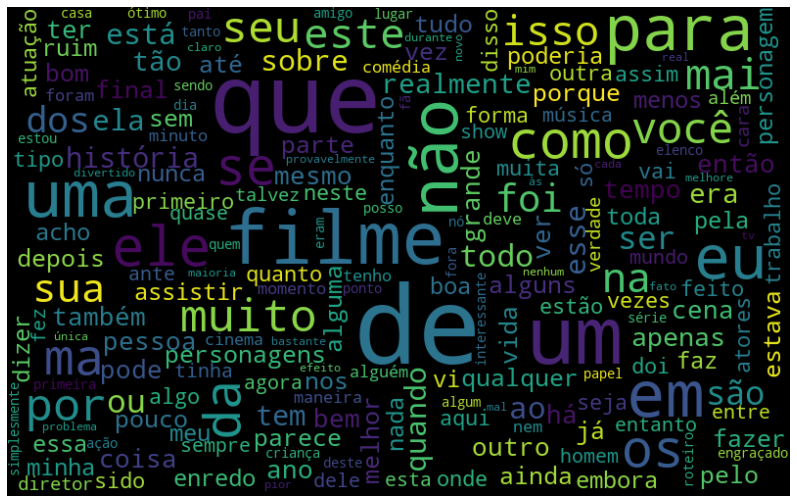

In [105]:
## Visualização Inicial

%matplotlib inline
def plot_word_cloud(data, text_col = 'text_pt', sent = ''):
  '''
  '''
  if sent in ['neg', 'pos']:
    data = data.query(f"sentiment == '{sent}'")
    
  
  words = ' '.join([text for text in data[text_col]])
  
  word_cloud = WordCloud(width = 800, height = 500,
                        max_font_size = 110,
                        collocations = False).generate(words)
  plt.figure(figsize = (18,9))
  plt.imshow(word_cloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.show()

plot_word_cloud(df, 'text_pt')

*WordCloud com muitos StopWords*

- Tokenização no dataset

In [106]:
# Calculando frequência que a palavra aparece

# Exemplo
a = ['Um', 'filme', 'ruim','um', 'filme', 'bom']
frequence = nltk.FreqDist(a)
frequence

FreqDist({'Um': 1, 'bom': 1, 'filme': 2, 'ruim': 1, 'um': 1})

In [107]:
# Separando todas as frases em uma variavel
words = ' '.join([text for text in df.text_pt])

token_space = tokenize.WhitespaceTokenizer()
token_words = token_space.tokenize(words)

In [108]:
# Calculando frequência das palavras

frequence    = nltk.FreqDist(token_words)
df_frequence = pd.DataFrame({'Palavra': list(frequence.keys()),
                             'Frequência': list(frequence.values())})

In [109]:
# Visualizando as 10 palavras com maior frequência
df_frequence.nlargest(columns = 'Frequência', n = 10)

,Palavra,Frequência
19,de,422584
13,que,332148
41,e,319925
3,o,291825
35,a,243149
7,um,226675
44,é,213549
8,filme,153156
28,não,146006
181,em,140495


In [110]:
def gen_word_frequence(data: 'Pandas.Series', tokenizer, n = 10):
  '''
    Tokeniza um Pandas Series, printa a frequência de cada token e retorna o objeto de Freq
  '''
  words = ' '.join([text for text in data])
  token_words = tokenizer.tokenize(words)
  frequence = nltk.FreqDist(token_words)
  df_frequence = pd.DataFrame({'Palavra': list(frequence.keys()),
                             'Frequência': list(frequence.values())}) 
  
  # df_frequence.nlargest(columns = 'Frequência', n = n)

  return df_frequence

#Testando função
gen_word_frequence(token_words, token_space)

,Palavra,Frequência
0,mais,57708
1,uma,136673
2,vez,15407
3,o,291825
4,sr,1875
...,...,...
156121,malkovitchesque,1
156122,bacanatudo,1
156123,muppified,1
156124,inventora,1


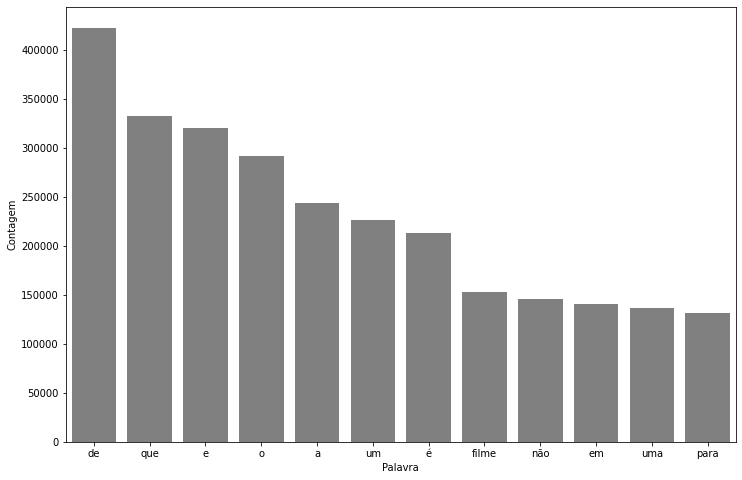

In [111]:
def pareto(data, quant):
  '''
  '''  

  df_freq = gen_word_frequence(data, token_space, quant)
  qnt_fre = df_freq.nlargest(columns = 'Frequência', n = quant)
  
  plt.figure(figsize = (12, 8))
  ax = sns.barplot(data = qnt_fre, x = 'Palavra', y = 'Frequência', color = 'gray')
  ax.set(ylabel = "Contagem")
  plt.show()

pareto(df['text_pt'], 12)

- Remoção de StopWords

In [112]:
# Lista de StopWords
stop_words = list(set(stopwords.words('portuguese') + list(STOP_WORDS)))

# Adicionaremos a palavra "filme" por se tratar de um dataset de review de filmes. 
stop_words.append('filme')
stop_words.append('filmes')
# Adicionados após analisar a frequência das palavras
stop_words.append('the')
stop_words.append('sr')

In [113]:
df['old_text'] = df['text_pt'].copy()


processed_word = list()

for opinion in df.text_pt:
  new_words = list()
  words_text = token_space.tokenize(opinion)
  for word in words_text:
    
    if word not in stop_words:
      new_words.append(word)
  processed_word.append(' '.join(new_words))

df['text_pt'] = processed_word

df[['old_text', 'text_pt']].sample(10)

,old_text,text_pt
39359,uma caricatura hilariante e precisa de tentar ...,caricatura hilariante precisa vender roteiro d...
12919,impecavelmente dirigido escrito interpretado e...,impecavelmente dirigido escrito interpretado f...
17775,foi muito feliz por ver o filme hari om no fes...,feliz hari om festival internacional cinema be...
9306,este filme foi recomendado para mim por alguns...,recomendado mim acadêmicos comentários expecta...
43763,um novo lado da história de victoria e albert ...,história victoria albert trazido vida diretor ...
15687,eu vi esse desenho animado como uma criança um...,vi desenho animado criança pai avô desenho ani...
26481,eu acabei assistindo the tenants com meus amig...,acabei assistindo tenants amigos próximos alug...
13892,eu vi esta minisérie quando eu estava no coleg...,vi minisérie colegial lembro sendo absolutamen...
15682,quando hoppity goes to town ele descobre nada ...,hoppity goes to town descobre más notícias peq...
9178,adolescente tamara jenna dewan está com uma ap...,adolescente tamara jenna dewan aparência difíc...


> Frequência de palavras antes da remoção de "filme"


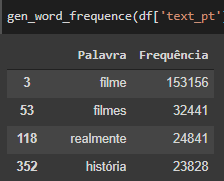

In [114]:
# Frequência de palavras após remoção de StopWords

gen_word_frequence(df['text_pt'], token_space).nlargest(columns = 'Frequência', n = 10)

,Palavra,Frequência
115,realmente,24841
349,história,23828
212,anos,18473
30,melhor,17325
173,pessoas,17061
11,personagens,14644
1248,vida,13036
101,vi,12206
57,assistir,11514
519,poderia,11247


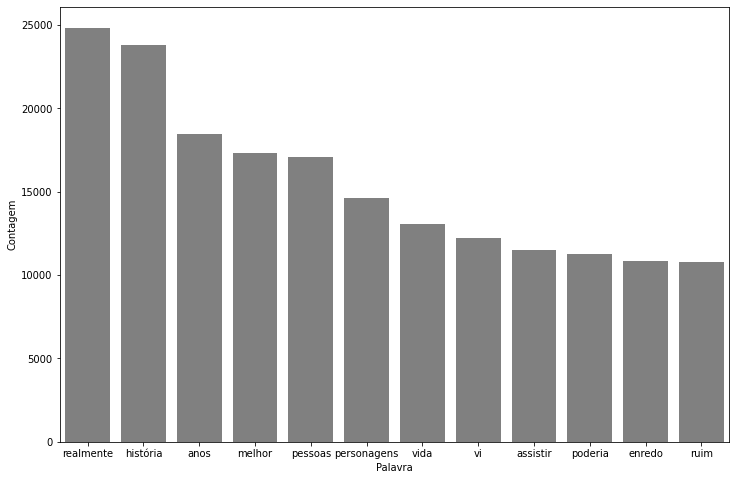

In [115]:
pareto(df['text_pt'], 12)

In [116]:
# Removendo acentuação:
df['old_text'] = df['text_pt'].copy()
df['text_pt'] = df['text_pt'].apply(lambda text: unidecode.unidecode(text))

df[['old_text', 'text_pt']].sample(10)

,old_text,text_pt
3803,muitas chamas milhares extras cenas batalha ce...,muitas chamas milhares extras cenas batalha ce...
8328,gosto principais atores envolvidos bizarro ter...,gosto principais atores envolvidos bizarro ter...
32716,verdadeiramente horrível fizeram programa tv d...,verdadeiramente horrivel fizeram programa tv d...
26063,bons amigos dicionário websters definem logofo...,bons amigos dicionario websters definem logofo...
1883,história trama homens idosos compartilham segr...,historia trama homens idosos compartilham segr...
27607,bubble esforço gay história romeu julieta isra...,bubble esforco gay historia romeu julieta isra...
17116,alguém dare ruim perdoe mel brooks comediante ...,alguem dare ruim perdoe mel brooks comediante ...
8014,pôster obras arte clubbed melhores independent...,poster obras arte clubbed melhores independent...
37154,amei anos vi dia abertura comovente bonito rec...,amei anos vi dia abertura comovente bonito rec...
18075,revelação capacidade dançar lana turners parti...,revelacao capacidade dancar lana turners parti...


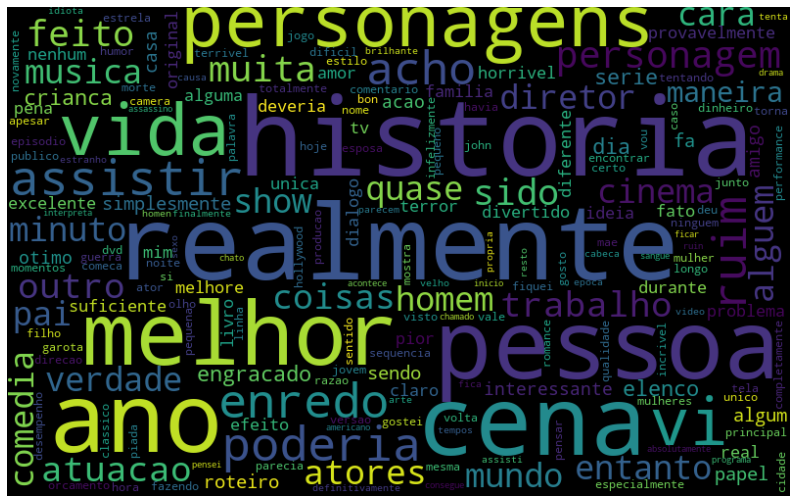

In [117]:
plot_word_cloud(df, 'text_pt')

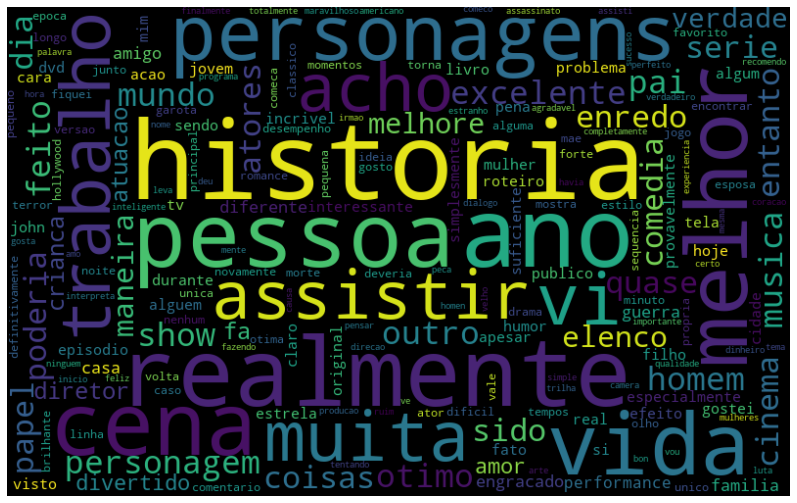

In [118]:
# Palavras em review positivas
plot_word_cloud(df,'text_pt', 'pos')

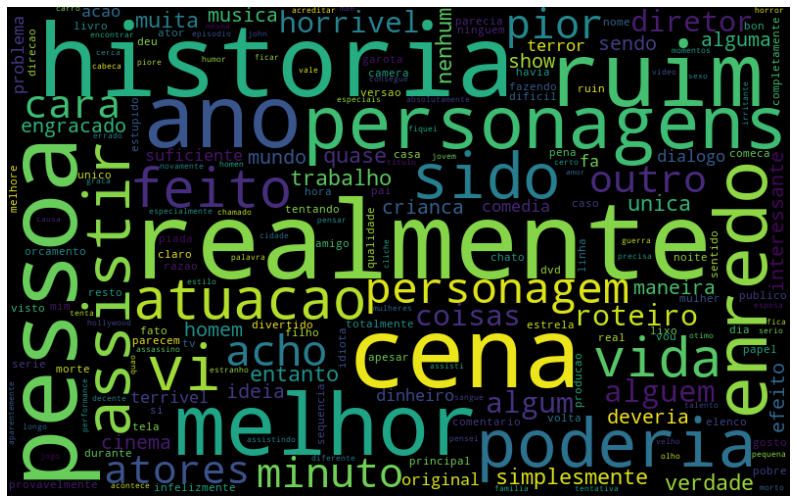

In [119]:
# Palavras em review negativas
plot_word_cloud(df,'text_pt', 'neg')

## Vetorização

- Bag of Words

In [120]:
def gen_bow_vectorizer(data: 'Pandas.Series'):
  '''
  '''
  bag_vetorizer = CountVectorizer(lowercase=False, max_features=50)
  return [bag_vetorizer, bag_vetorizer.fit_transform(data)]

bow = gen_bow_vectorizer(df['text_pt'])
bag_of_words = bow[1]
bag_of_words.shape

(49459, 50)

In [121]:
# Visualizando o Bag of Words
bag_vetorizer = bow[0]
matrix_sparse = pd.DataFrame.sparse.from_spmatrix(bag_of_words, 
                                                  columns=bag_vetorizer.get_feature_names_out())
matrix_sparse

,acao,acho,alguem,algum,anos,assistir,atores,atuacao,cara,cena,...,ruim,sendo,serie,show,sido,simplesmente,trabalho,verdade,vi,vida
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,0,0,0,0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,2,2,1,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49454,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49456,0,0,0,0,1,1,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
49457,1,1,0,0,4,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


- TF-IDF

In [122]:
def gen_tfidf_vectorizer(data: 'Pandas.Series'):
  '''
  '''
  tfidf_vectorizer = TfidfVectorizer(lowercase=False, max_features=50)
  return tfidf_vectorizer.fit_transform(data)

tfidf_normalizer = gen_tfidf_vectorizer(df['text_pt'])

- Ngrams


In [123]:

def gen_ngrams_vectorizer(data: 'Pandas.Series'):
  '''
  '''
  tfidf_ngrams = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
  return [tfidf_ngrams, tfidf_ngrams.fit_transform(data)]

ngram_tfidf = gen_ngrams_vectorizer(df['text_pt'])[1]


### TREINANDO E AVALIANDO O MÉTODO LOGISTIC REGRESSION

In [124]:
def logistic_text_classifier(data, vectorizer):
  '''
     
  '''
  
  train, test, labels_train, labels_test = train_test_split(vectorizer,
                                                         data,
                                                         random_state = 42)  
  lr = LogisticRegression()
  lr.fit(train, labels_train)
  return [lr, lr.score(test, labels_test)]

logistic_with_bag   = logistic_text_classifier(df['classificacao'], bag_of_words)
logistic_with_tfidf = logistic_text_classifier(df['classificacao'], tfidf_normalizer)
logistic_with_ngram = logistic_text_classifier(df['classificacao'], ngram_tfidf)

print(f'''
        Logistic with BagOfWords: {logistic_with_bag[1]}, 
        Logistic with TF-IDF: {logistic_with_tfidf[1]}, 
        Logistic with Ngrams: {logistic_with_ngram[1]}''')


        Logistic with BagOfWords: 0.6947027901334412, 
        Logistic with TF-IDF: 0.6954306510311363, 
        Logistic with Ngrams: 0.8761019005256773


### TREINANDO E AVALIANDO O MÉTODO NAIVE BAYES

In [125]:
def bayes_text_classifier(data, vectorizer):
  '''
     
  '''
  from sklearn.naive_bayes import MultinomialNB
  train, test, labels_train, labels_test = train_test_split(vectorizer,
                                                         data,
                                                         random_state = 42)  
  MultinomialNB = MultinomialNB()
  MultinomialNB.fit(train, labels_train)
  return [MultinomialNB, MultinomialNB.score(test, labels_test)]

bayes_with_bag   = bayes_text_classifier(df['classificacao'], bag_of_words)
bayes_with_tfidf = bayes_text_classifier(df['classificacao'], tfidf_normalizer)
bayes_with_ngram = bayes_text_classifier(df['classificacao'], ngram_tfidf)
print(f'''
          Naive Bayes with BagOfWords: {bayes_with_bag[1]}, 
          Naive Bayes with TF-IDF: {bayes_with_tfidf[1]}, 
          Naive Bayes with Ngrams: {bayes_with_ngram[1]}''')


          Naive Bayes with BagOfWords: 0.6892033966841893, 
          Naive Bayes with TF-IDF: 0.6892033966841893, 
          Naive Bayes with Ngrams: 0.8765062676910634


## Tentativa de melhorias



- Stemização - Remoção dos sufixos das palavras  

In [127]:
stemmer = nltk.RSLPStemmer()

# Exemplos
print(stemmer.stem('corredor'))
print(stemmer.stem('correr'))
print(stemmer.stem('corrida'))

corr
corr
corr


*corredor poderia ser o "corredor de casa"*

 


In [128]:
# Atualizando reviews com dados "stemizados"
token_pontuacao = tokenize.WordPunctTokenizer()

df['old_text'] = df['text_pt'].copy()

processed_words = list()

for opinion in df['text_pt']:
  new_word = list()
  text_words = token_pontuacao.tokenize(opinion)
  for word in text_words:
      new_word.append(stemmer.stem(word))
  processed_words.append(' '.join(new_word))

df['text_pt'] = processed_words
 

df[['old_text', 'text_pt']].head()

,old_text,text_pt
0,costner arrumou necessario terriveis sequencia...,costn arrum necessari terri sequenc resgat mar...
1,motivo acao mesmos generico chato valha pena a...,motiv aca mesm gener chat valh pen assist comp...
2,odeio raps imbecis poderiam agir arma pression...,odei rap imbecil pod agir arm pression test am...
3,beatles escrever musicas gostassem walter hill...,beatl escrev music gost walt hill moptop incom...
4,fotos latao palavra apropriada verdade ousados...,fot lata palavr apropri verdad ous qual visual...


### Naive Bayes with Ngrams 

In [130]:
ngram_tfidf = gen_ngrams_vectorizer(df['text_pt'])[1]

bayes_with_ngram = bayes_text_classifier(df['classificacao'], ngram_tfidf)
print(f'Naive Bayes with Ngrams: {bayes_with_ngram[1]}')

Naive Bayes with Ngrams: 0.8743226849979782


### Logistic Regression with Ngrams 

In [131]:
ngram_tfidf = gen_ngrams_vectorizer(df['text_pt'])[1]

logistic_with_ngram = logistic_text_classifier(df['classificacao'], ngram_tfidf)
print(f'Logistic Regression with Ngrams: {logistic_with_ngram[1]}')

Logistic Regression with Ngrams: 0.8788515972503033


In [133]:
# Calculando pesos Logistic 
tfidf = gen_ngrams_vectorizer(df['text_pt'])[0]

pesos = pd.DataFrame(
    logistic_with_ngram[0].coef_[0].T,
    index = tfidf.get_feature_names_out()
)

# Review Positivas
pesos.nlargest(10,0)

,0
otim,10.758672
excel,9.602567
perfeit,7.192568
maravilh,6.736303
favorit,6.599346
incri,5.990614
divert,5.623345
ador,5.208150
brilh,5.081749
hoj,4.758191


In [134]:
# Reviews Negativas
pesos.nsmallest(10,0)

,0
ruim,-13.101218
pi,-12.483802
horri,-10.649584
terri,-8.994224
chat,-8.084706
tent,-6.128423
lix,-5.962890
estup,-5.920709
minut,-5.750889
ridicul,-5.657550


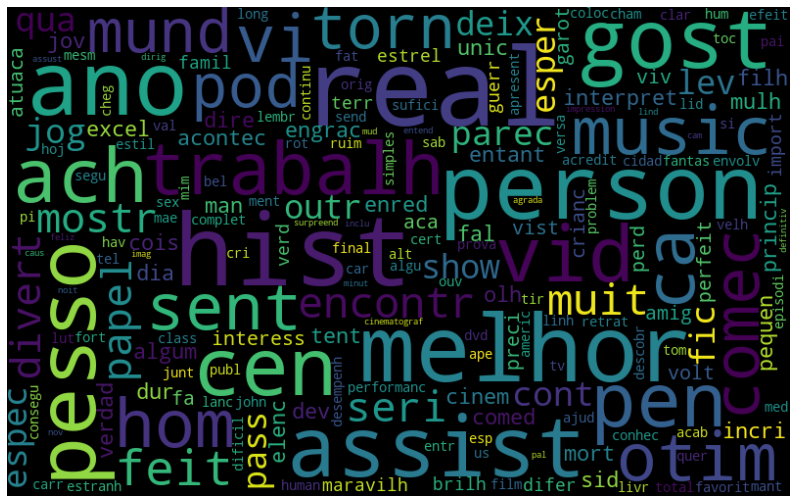

In [136]:
plot_word_cloud(df,'text_pt', 'pos')

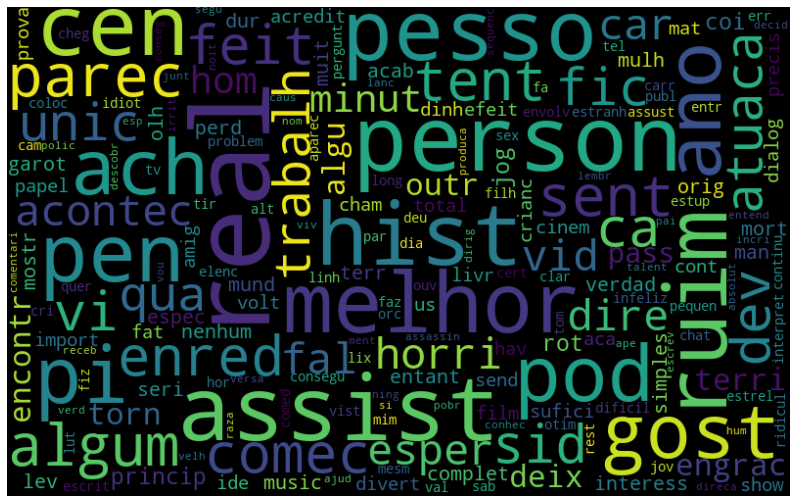

In [135]:
plot_word_cloud(df,'text_pt', 'neg')

### Conclusão

Mesmo que com pouca diferença, Logist Regression utilizando TF-IDF usando bigramas teve uma acurácia maior. Notamos que o texto ainda possuía alguns ruídos da tradução onde alguns títulos não foram totalmente traduzidos, então removemos alguns termos que apareciam com recorrência como o "the".

Outra coisa que notamos foi a quantidade de palavras semelhantes que existiam em ambas as categorias do review ("pos", "neg") como a palavra "melhor".